# View BKmodels stars SED

- author : Sylvie Dagoret-Campagne
- creation 2024-07-31

In [1]:
# Import some generally useful packages

import os,re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from astropy.io import fits

In [2]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
# Import the primary photometry classes from rubin_sim.photUtils
from rubinsimphot.phot_utils import Bandpass, Sed
from rubinsimphot.data.data_sets import  get_data_dir

## Config

### Find where are the data

In [4]:
# Find the throughputs directory 
#fdir = os.getenv('RUBIN_SIM_DATA_DIR')
fdir = get_data_dir()
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')



#### definition of path

In [5]:
fauxteldir = os.path.join(fdir, 'throughputs', 'auxtel')
flsstdir = os.path.join(fdir, 'throughputs', 'baseline')
seddir = os.path.join(fdir, 'pysynphot', 'bkmodels')

In [6]:
#!ls $flsstdir

In [7]:
#!ls $fauxteldir

#### Read the throughput curves

In [8]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
filtercolors = {'u':'b', 'g':'c', 'r':'g', 'i':'orange', 'z':'r', 'y':'m'}

In [9]:
lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].read_throughput(os.path.join(flsstdir, f'hardware_{f}.dat'))

In [10]:
auxtel = {}
for f in filterlist:
    auxtel[f] = Bandpass()
    auxtel[f].read_throughput(os.path.join(fauxteldir, f'auxtel_sdss_{f}p_total.dat'))

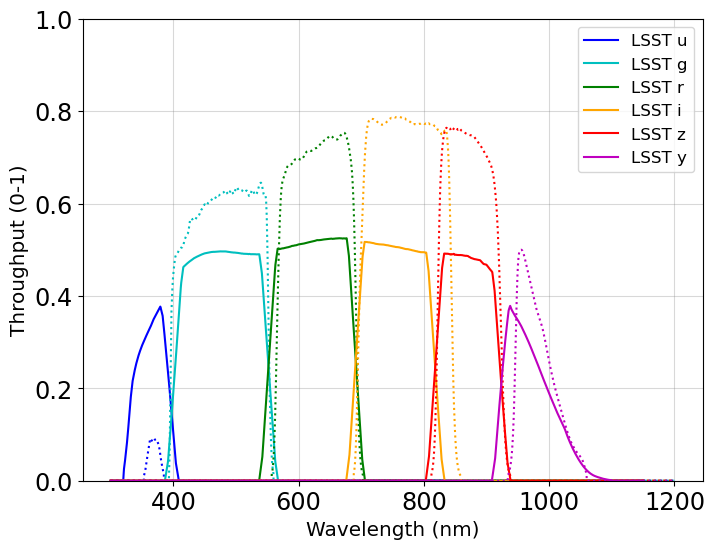

In [11]:
# Plot the curves .. see what we have. 
filtercolors = {'u':'b', 'g':'c', 'r':'g', 'i':'orange', 'z':'r', 'y':'m'}

plt.figure(figsize=(8,6))
for f in filterlist:
    plt.plot(lsst[f].wavelen, lsst[f].sb, color=filtercolors[f], label=f"LSST {f}")
    plt.plot(auxtel[f].wavelen, auxtel[f].sb,':' ,color=filtercolors[f])
plt.xlabel("Wavelength (nm)", fontsize='x-large')
plt.ylabel("Throughput (0-1)", fontsize='x-large')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, color='gray')
plt.legend(loc='upper right', fancybox=True, fontsize='large')

## SED

In [12]:
#!cat $seddir/BKMODELS_README

The atlas is grouped into different “blocks” (A, B, C, D, M, and S), corresponding to the physical distinctions of their underlying model atmospheres. It consists of 1434 files, each of which represents a metal-line blanketed flux spectrum for a theoretical stellar model atmosphere. Data files are named “bk_mnnnn.fits”, where m is the block code and nnnn the sequence number.

Physical fluxes of the spectra are given in FLAM surface flux units, i.e.  ergs cm−2 s−1A−1. These flux units differ from those in the Kurucz CD-ROM by a factor of  3.336x10−19∗λ2/4π; i.e. are converted from ergs cm−2 s−1Hz−1 steradian−1 to ergs cm−2 s−1 A−1.  To convert to observed flux at Earth, multiply by a factor of (R/D)2 where R is the stellar radius, and D is the distance to Earth.

In [13]:
list_of_files = os.listdir(seddir)

In [14]:
spectral_files = []
for filename in list_of_files:
    if ".fits" in filename:
        spectral_files.append(filename)
        

In [15]:
spectral_files = sorted(spectral_files)
spectral_files[:10]

['bk_a0001.fits',
 'bk_a0002.fits',
 'bk_a0003.fits',
 'bk_a0004.fits',
 'bk_a0005.fits',
 'bk_a0006.fits',
 'bk_a0007.fits',
 'bk_a0008.fits',
 'bk_a0009.fits',
 'bk_a0010.fits']

## decode

### Decode one file

In [16]:
re.findall("^bk_(.*)[0-9][0-9][0-9][0-9][.]fits$",spectral_files[0] )

['a']

In [17]:
re.findall("^bk_.*([0-9][0-9][0-9][0-9])[.]fits$",spectral_files[0] )

['0001']

In [18]:
file_ref = os.path.join(seddir, spectral_files[0])

In [19]:
hdul = fits.open(file_ref)

In [20]:
hdul.info()
hdul[0].header

Filename: /Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/rubinsimphot/src/rubin_sim_data/pysynphot/bkmodels/bk_a0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1                1 BinTableHDU     28   342R x 5C   [1E, 1E, 1E, 1E, 1E]   


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
ORIGIN  = 'STScI-STSDAS/TABLES' / Tables version 1999-03-22                     
FILENAME= 'bk_a0001.fits'      / name of file                                   
DESCRIP = '= ''Buser-Kurucz models'''                                           
TARGETID= '= '' '' '                                                            
OBSMODE = '= '' '' '        

In [21]:
df = pd.DataFrame(hdul[1].data)

In [22]:
df.head()

,WAVELENGTH,FLUX,STATERROR,SYSERROR,FWHM
0,229.000000,0.0,NaN,NaN,NaN
1,234.000000,0.0,NaN,NaN,NaN
2,243.000000,0.0,NaN,NaN,NaN
3,252.000015,0.0,NaN,NaN,NaN
4,256.000000,0.0,NaN,NaN,NaN


### Decode all files

In [23]:
df = pd.DataFrame(columns=["index","letter","numstr","num","filename"])
for index,file in enumerate(spectral_files):
    letter = re.findall("^bk_(.*)[0-9][0-9][0-9][0-9][.]fits$",file )[0]
    number_str = re.findall("^bk_.*([0-9][0-9][0-9][0-9])[.]fits$",file )[0]
    number = int(number_str)
    df.loc[index] = [index,letter,number_str,number,file]
   
    

In [24]:
df

,index,letter,numstr,num,filename
0,0,a,0001,1,bk_a0001.fits
1,1,a,0002,2,bk_a0002.fits
2,2,a,0003,3,bk_a0003.fits
3,3,a,0004,4,bk_a0004.fits
4,4,a,0005,5,bk_a0005.fits
...,...,...,...,...,...
1428,1428,m,0005,5,bk_m0005.fits
1429,1429,s,0001,1,bk_s0001.fits
1430,1430,s,0002,2,bk_s0002.fits
1431,1431,s,0003,3,bk_s0003.fits


In [25]:
categories = df["letter"].unique()
categories

array(['a', 'b', 'c', 'd', 'm', 's'], dtype=object)

In [26]:
df["num"].min()

1

In [27]:
df["num"].max()

590

In [28]:
df_a = df[df.letter == "a"]
df_b = df[df.letter == "b"]
df_c = df[df.letter == "c"]
df_d = df[df.letter == "d"]
df_m = df[df.letter == "m"]
df_s = df[df.letter == "s"]

In [29]:
df_a.reset_index(drop=True,inplace=True)
df_b.reset_index(drop=True,inplace=True)
df_c.reset_index(drop=True,inplace=True)
df_d.reset_index(drop=True,inplace=True)
df_m.reset_index(drop=True,inplace=True)
df_s.reset_index(drop=True,inplace=True)

In [30]:
all_df = [df_a,df_b,df_c,df_d,df_m,df_s]

In [31]:
cat_cmap = ["Purples","Blues","Greens","Oranges","Reds","Greys"]

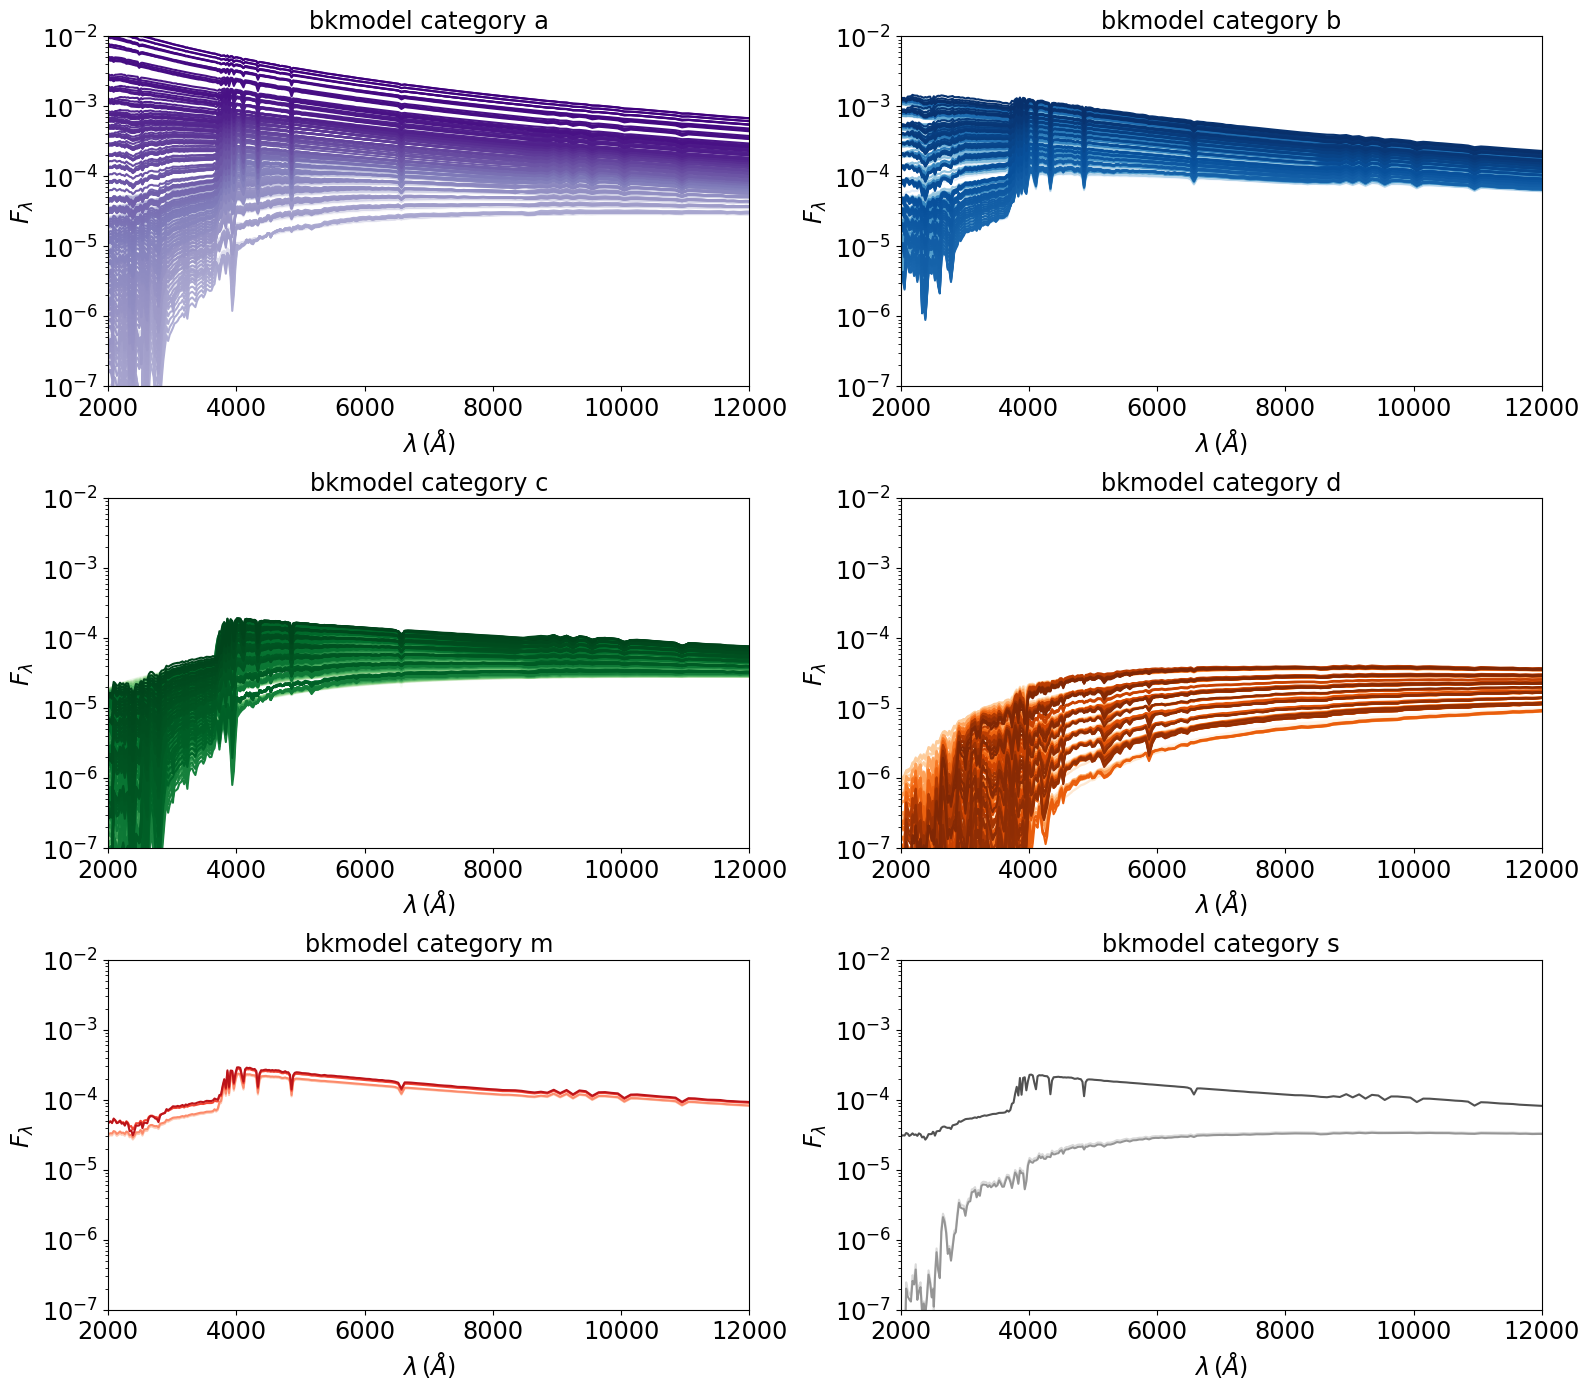

In [32]:
Ncat = len(categories)

fig,axs = plt.subplots(3,2,figsize=(16,14))

axes = axs.flatten()

for index,ax in enumerate(axes):
    the_df = all_df[index]
    cmapname = cat_cmap[index] 
    cat = categories[index]
    N = len(the_df)
    the_cmap = plt.get_cmap(cmapname)
    cNorm = mpl.colors.Normalize(vmin=0, vmax=N)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmapname)
    all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)
   
    for idx in range(N):
        row = the_df.loc[idx]
        filename = row["filename"]
        fullfilename = os.path.join(seddir,filename)
        hdul = fits.open(fullfilename)
        df_sed = pd.DataFrame(hdul[1].data)
        #selection = (df_sed["WAVELENGTH"] > 2000.) & (df_sed["WAVELENGTH"] < 15000.).values
        # avoid Big-endian buffer not supported on little-endian compiler
        #cut = [x.byteswap().newbyteorder() for x in selection]   
        #df_sed = df_sed.loc[cut]
        ax.plot( df_sed.WAVELENGTH,df_sed.FLUX,c=all_colors[idx])

    
    ax.set_xlim(2000.,12000.)
    ax.set_ylim(1e-7,1e-2)
    ax.set_yscale("log")
    ax.set_title(f"bkmodel category {cat}")
    ax.set_xlabel("$\lambda \, (\\AA) $")
    ax.set_ylabel("$F_\lambda$")
    
plt.tight_layout()